In [ ]:
# номер варианта
variant # 4

2

# 1-ое задание

In [ ]:
import pandas
import numpy as np
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

In [ ]:
V = 2
X_1=np.array([42,98,32,27,2,102,228,112,122,178])
X_2=np.array([12,108,22,17,103,122,218,92,198,158])
X=np.array([X_1,X_2])
X

array([[ 42,  98,  32,  27,   2, 102, 228, 112, 122, 178],
       [ 12, 108,  22,  17, 103, 122, 218,  92, 198, 158]])

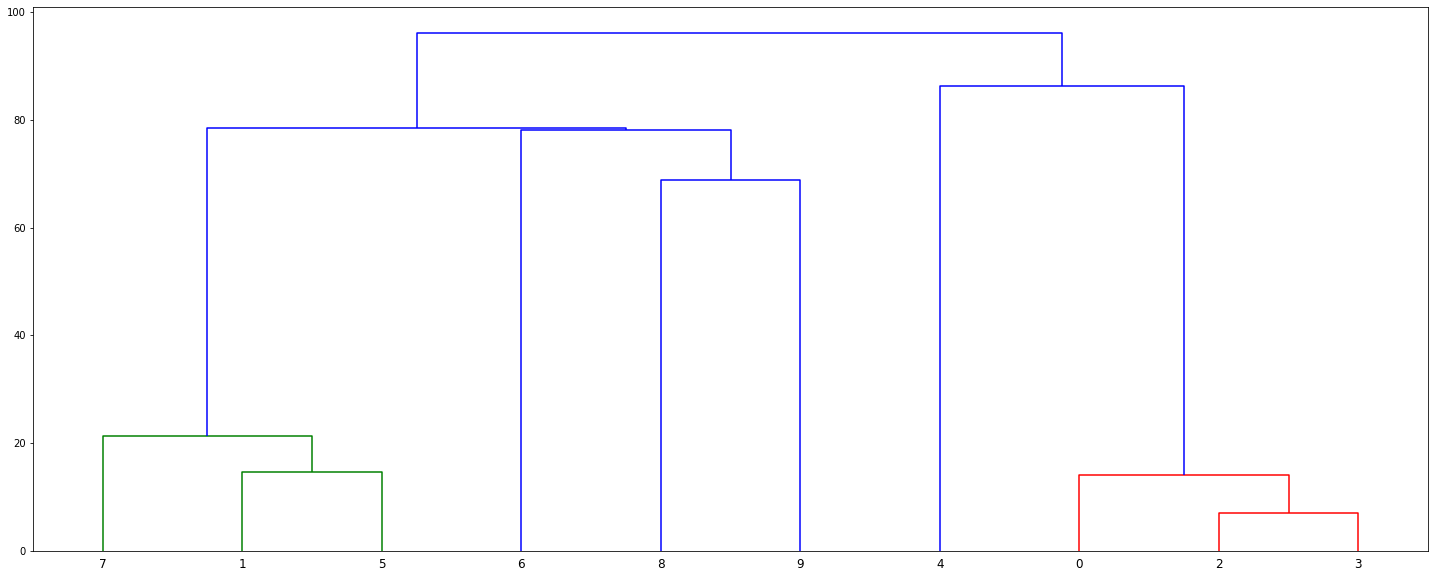

In [ ]:
#  ближний сосед

Z = linkage(X.T, method='single')
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)
plt.show()

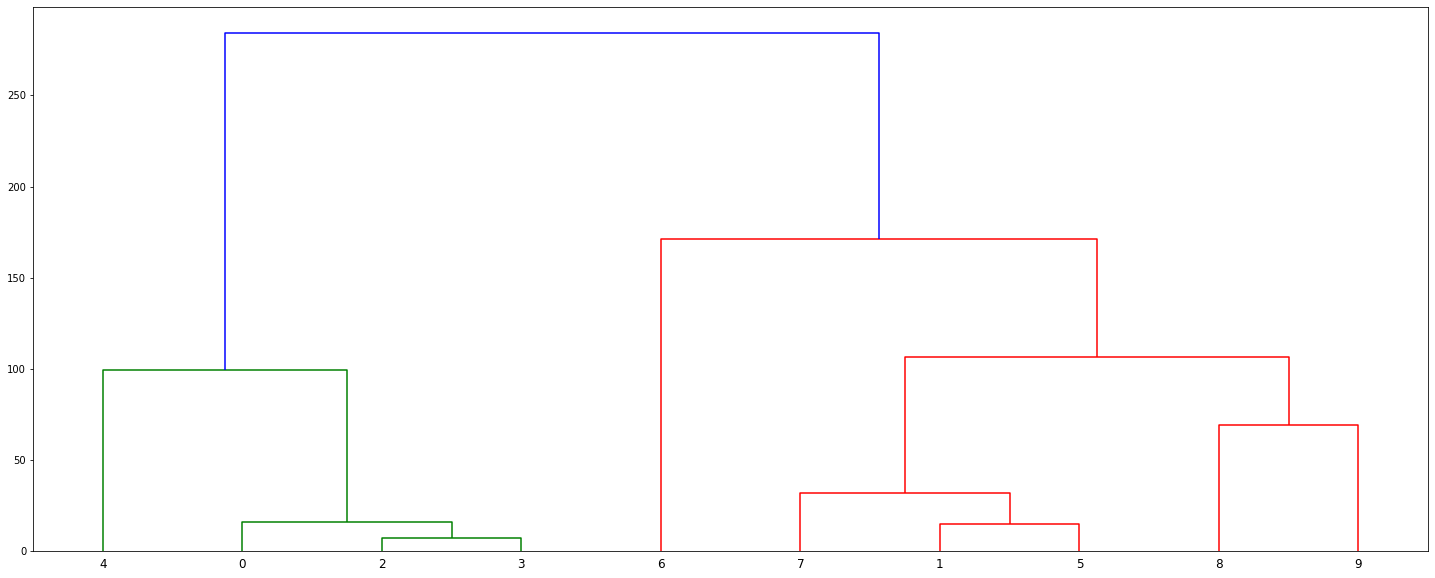

In [ ]:
#  дальний сосед

Z = linkage(X.T, method='complete')
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)
plt.show()

# 2-ое задание

In [ ]:
# данные

csv_table = pandas.read_csv('data.csv')
df = pandas.DataFrame(csv_table)

X = df.drop(columns=['country','price','date','street','statezip','city','yr_built','yr_renovated'])
Y = df['bedrooms']

In [ ]:
Y.value_counts()

3.0    2032
4.0    1531
2.0     566
5.0     353
6.0      61
1.0      38
7.0      14
0.0       2
8.0       2
9.0       1
Name: bedrooms, dtype: int64

In [ ]:
# PCA

import plotly.express as px
from sklearn.decomposition import PCA

pca = PCA()
components = pca.fit_transform(X)
labels =  {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}

fig = px.scatter_matrix(
    components,
    labels={'color': 'bedrooms'},
    dimensions=range(2),
    color=Y
)
fig.update_traces(diagonal_visible=False)
fig.show()

In [ ]:
# tSNE

from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=0)
projections = tsne.fit_transform(X)

fig = px.scatter(
    projections, x=0, y=1,
    color=Y, labels={'color': 'bedrooms'}
)
fig.show()

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



In [ ]:
pip install umap-learn

In [ ]:
# UMAP

from umap import UMAP

umap = UMAP(n_components=2, init='random', random_state=0)
proj = umap.fit_transform(X)
fig = px.scatter(
    proj, x=0, y=1,
    color=Y, labels={'color': 'bedrooms'}
)
fig.show()